# Going off on a tangent with Newton's method

In this notebook we study Newton's method, a particularly efficient type of fixed-point iteration.

See Chapter 19 of 

*Q. Kong, T. Siauw, and A. M. Bayen. Python Programming and Numerical Methods: A Guide for Engineers and Scientists. Academic Press, 2021. (https://pythonnumericalmethods.berkeley.edu/)*

and Section 2.3 of 

*Richard L. Burden, J. Douglas Faires and Annette M. Burden. Numerical Analysis (10th Edition). Cengage, 2016.*

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Implementation of the method

Our goal is to solve a root-finding problem $f(x) =0$. Recall that Newton's method is just a fixed-point iteration applied to the function $g(x) = x - f(x)/f'(x)$. 

Here we provide a Python implementation of the method, similarly to what we did for `bisection` and `fixed_point`.

In [3]:
def newton(f, Df, p0, TOL, N_max):
    """
    Finds a root of f(x) using Netwon's method with p0 as initial guess, N_max maximum iterations, 
    a tolerance criterion on the relative increment with parameter TOL (i.e., method stops when 
    |p_n - p_{n-1}|/|p_n| <= TOL). This function requires the derivative of f as input as well.

    The function returns an array containing the sequence of approximations computed by the method.
    """
    
    n = 0  # initialize iteration counter
    p = p0 # initialize current approximation 
    rel_increment = np.inf # initialize relative increment to enter the while loop
    p_array = np.array(p).reshape(1,1)  # initialize array of approximations
    
    while (n < N_max and rel_increment > TOL):
        n = n + 1 # increase iteration counter
        if Df(p) == 0: # Make sure that we can divide by f'(p)
            raise TypeError("Derivative of f vanishes. Newton's iteration is not well defined.")
        p = p - f(p)/Df(p)  # Newton's iteration 
        rel_increment = np.abs(p - p_array[-1]) / np.abs(p) # update relative increment
        p_array = np.vstack((p_array, p)) # add current approximation to array

    # maximum number of iterations reached, but return the array of approximations anyways
    return p_array 

## Comparison between bisection and Newton's iteration

To showcase the effectiveness of Newton's method, we compare it with bisection. First, we define the `bisection` function, already introduced in the notebook [Bisection: divide et impera](https://github.com/simone-brugiapaglia/numerical-analysis-notebooks/blob/main/03_bisection.ipynb).

In [78]:
def bisection(f, a, b, TOL, N_max):
    """
    Approximates a root of a function f over the interval [a, b] via the bisection method
    using N_max maximum iterations and a tolerance criterion on the absolute
    error (based on the semi-size of the current interval) with parameter TOL (i.e., method
    stops when semisize is less than or equal to TOL).

    The function returns an array containing the sequence of approximations computed by the method.
    """

    # precompute f(a) and f(b) to save function evaluations
    fa = f(a)
    fb = f(b)

    # preliminary checks
    if fa * fb > 0: # f(a) and f(b) do not have opposite signs
        raise TypeError("Bisection cannot be applied: f(a) and f(b) do not have opposite signs")
    elif fa == 0: 
        return a # a is a root
    elif fb == 0: 
        return b # b is a root
        

    n = 0                  # inizialize iteration counter n
    semisize = (b - a) / 2 # initialize interval semisize
    p_array = np.array([], dtype=np.int64).reshape(0,1) # initialize array of approximations
    
    while (n < N_max and semisize > TOL):
        n = n + 1        # increase iteration counter
        p = a + semisize # compute midpoint
        fp = f(p)        # evaluate f  at midpoint
        p_array = np.vstack((p_array, p)) # add current approximation to array
        
        if (fp == 0 or semisize < TOL): # root found
            return p_array 
        
        if fa * fp > 0: 
            a = p # choose right semi-interval
        else:           
            b = p # choose left semi-interval

        semisize = (b - a) / 2 # update interval semi-size

    # maximum number of iterations reached, but return the array of approximations anyways
    return p_array 

Now, we apply bisection to find a root of the function $f(x) = \cos(x)$ over the interval $[0,2]$.

In [104]:
f = lambda x: np.cos(x)
x_grid = np.linspace(0,2,1000)
p = math.pi/2

# define algorithm's parameters
a = 0
b = 2
TOL = 1e-8
N_max = 100

# apply the bisection method
p_array_bisection = bisection(f, a, b, TOL , N_max) 

print(p_array_bisection)

[[1.        ]
 [1.5       ]
 [1.75      ]
 [1.625     ]
 [1.5625    ]
 [1.59375   ]
 [1.578125  ]
 [1.5703125 ]
 [1.57421875]
 [1.57226562]
 [1.57128906]
 [1.57080078]
 [1.57055664]
 [1.57067871]
 [1.57073975]
 [1.57077026]
 [1.57078552]
 [1.57079315]
 [1.57079697]
 [1.57079506]
 [1.57079601]
 [1.57079649]
 [1.57079625]
 [1.57079637]
 [1.57079631]
 [1.57079634]
 [1.57079633]]


Now, we apply Newton's method to the same root-finding problem, choosing $p_0 = 2$.

In [99]:
Df = lambda x : - np.sin(x) # define f'(x) 
p0 = 2 # initial guess

# apply Newton's method
p_array_newton = newton(f, Df, p0, TOL , N_max) 

# print sequence of approximations
print(p_array_newton)

[[2.        ]
 [1.54234245]
 [1.57080401]
 [1.57079633]
 [1.57079633]]


Newton's method is able to converge in way less iterations than bisection! To visually compare the two methods, we show a convergence plot.

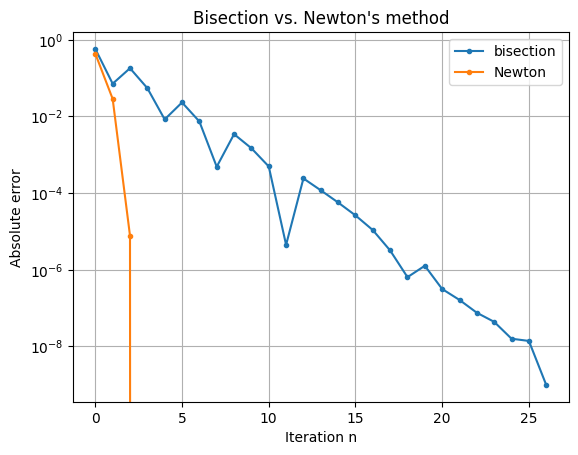

In [100]:
# Generate arrays of iteration values
n_values_bisection = np.arange(p_array_bisection.size) 
n_values_newton = np.arange(p_array_newton.size) 

# show convergence plots
plt.semilogy(n_values_bisection, np.abs(p_array_bisection - p), '.-', label = 'bisection')
plt.semilogy(n_values_newton, np.abs(p_array_newton - p), '.-', label = 'Newton')
plt.xlabel("Iteration n")
plt.ylabel("Absolute error")
plt.title("Bisection vs. Newton's method")
plt.legend()
plt.grid()
plt.show()

## Newton fractals: The Julia set

Surprisingly, Newton's method can be used to generate fractals called *Newton fractals* (see https://en.wikipedia.org/wiki/Newton_fractal). Here, we illustrate the construction of the Julia set, one of the most popular Newton fractals. The Julia set is based on the convergence properties of Newton's method applied to the complex function $f:\mathbb{C} \to \mathbb{C}$, defined by
$$
f(z) = z^3 -1.
$$
This function has the following three complex roots:
\begin{align*}
z_1 & = 1, \\
z_2 & = \cos(2\pi/3) + \sin(2\pi/3) i,\\
z_2 & = \cos(-2\pi/3) + \sin(-2\pi/3) i.
\end{align*}
Newton's method applied with $p_0 \in \mathbb{C}$ could converge to any of these roots (or, possibly, diverge). The Julia set is constructed by assigning a different color to points in the complex plane based on what root of the unity Netwon's method converges to when $p_0$ is the initial guess. Here we implement a simple example where $p_0$ is chosen from a grid of points in the square $[-1, 1]^2 \subseteq \mathbb{C}$.

**Note:** depending on your computer, the following cell could take a while to run. If it is taking too long, just interrupt the kernel (using the stop icon on the top bar) and choose a smaller value of the parameter `grid_size`. 

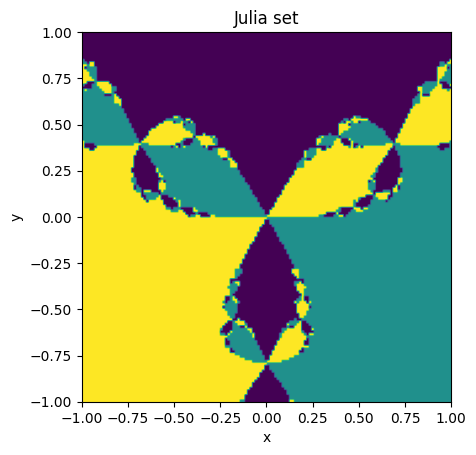

In [122]:
# Define function f and its derivative 
f  = lambda z: z**3 - 1
Df = lambda z: 3 * z**2

# define complex roots of f(z)
z1 = 1
z2 = np.cos(2 * np.pi/3) + np.sin(2 * np.pi/3) * 1j
z3 = np.cos( - 2 * np.pi/3) + np.sin( - 2 * np.pi/3) * 1j
roots = np.array([z1, z2, z3]) # array of complex roots of f

# define parametes of Newton's method
TOL = 1e-3
N_max = 5

# Define grid of initial guesses
grid_size = 150
grid_values = np.linspace(-1, 1, grid_size)

# initialize stuff
i = 0 # initialize counter
Julia_color = np.zeros([grid_size, grid_size]) # initialize matrix of colors that will define the Julia set

for x in grid_values:
    j = 0

    for y in grid_values:

        if p0 != 0:

            p0 = x + y * 1j # initial guess in the grid
            p_array = newton(f, Df, p0, TOL, N_max)   # apply Newton
            dist_roots = np.abs(p_array[-1] - roots)  # compute distances from roots 
            Julia_color[i, j] = np.argmin(dist_roots) # find minimum distance
            
        j += 1
    
    i += 1


# Plot Julia set (Newton fractal)

plt.imshow(Julia_color, origin='lower', extent = [-1,1,-1,1])
plt.title('Julia set')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Recommended problems

1. Implement Netwon's method using the fuction `fixed_point` of the notebook [Fixed-point iteration: keep calm and apply g(·)](https://github.com/simone-brugiapaglia/numerical-analysis-notebooks/blob/main/04_fixed_point.ipynb)
2. Implement and test modified Newton's method. Try to find examples where modified Netwon outperforms Newton's method.
3. Have fun generating Newton's fractals
